# ASTR 596 Computer lab - Characterizing CCDs (50 points)

In this lab you will learn how to:
* read in a CCD image into python
* learn how to display a CCD image
* measure properties of that CCD image
* from a set of CCD Bias frames and Flat field frames, determine the readnoise and gain of the CCD

<i>Note: Enter in all code to the problems in the provided notebook cells. Questions to answer will be <b>bolded</b>.</i>  

All your answers should be entered in this notebook. Each student will need to hand in their own notebook by uploading it to GitHub following the instructions.

In the code places where you will need to put something or write your own code are specified by `#***************`  You will not get points for doing this unless explicitly noted.  Some of these things are just to make sure you are setting up your paths correctly.

**Due on Nov. 3 at Noon** to be handed into the "Characterizing CCDs" assignment in Module 6.

### Import modules

In [26]:
import os
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import scoreatpercentile
import glob
%matplotlib inline
from astropy.nddata import CCDData
import astropy.units as u
from ccdproc import ImageFileCollection, Combiner, combine
from ccdproc import wcs_project

### Define a function for displaying images

* We will want to look at images as we examine and analyze the data, so here will will define a function for displaying images. 
* This will handle getting the stretch of the image correct. 
* Feel free to play with the settings and colormap once you get the hang of the process.



In [27]:
def imdisplay(image, v1perc=10, v2perc=95):
    '''
    display an image 
    OPTIONAL KEYWORD PARAMETERS
    v1perc: one end of the colormap assigned to the v1perc percent lowest flux 
    v2perc: the other end of the colormap assigned to the v2perc percent highest flux    
    '''
    # make sure image is an np array
    nimage = np.array(image)
    # determine the pixel values at the 10th and 95th percentile
    v1 = scoreatpercentile(nimage,v1perc)
    v2 = scoreatpercentile(nimage,v2perc)
    # display using imshow
    #
    # you can play with alternate cmaps in the function below, such as "viridis" or "gray"
    # The 'gray_r' color map reverses the color-scale so that dark display pixels are the brightest in the image
    #
    # vmin and vmax set the min and max pixel values that
    # will be mapped to the extremes of the colormap
    plt.imshow(nimage,cmap='gray_r',vmin=v1,vmax=v2)
    plt.colorbar(fraction=.08)

### Display raw science image

Text(0.5, 1.0, 'V-band Raw Image')

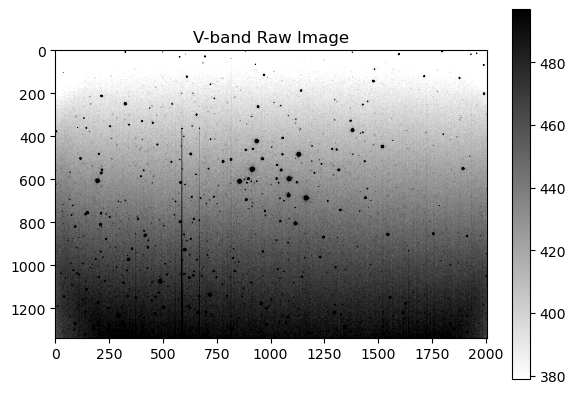

In [28]:
plt.figure()
data_vimraw, header_vimraw = fits.getdata('M29-0005g.fit',header=True)
imdisplay(data_vimraw)
plt.title("V-band Raw Image")

### Display processed science image

Text(0.5, 1.0, 'V-band Processed Image')

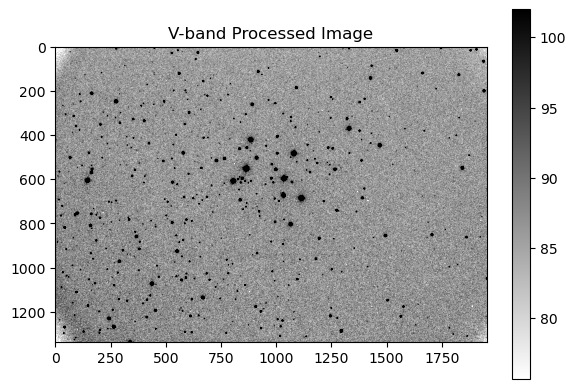

In [29]:
plt.figure()
data_vimproc, header_vimproc = fits.getdata('cazfdp-M29-0005g.fits',header=True)
imdisplay(data_vimproc)
plt.title("V-band Processed Image")

## Problem 1 (5 points)

The two images above are the same exact image except that one is raw and one has been fully processed.  In the cell below, describe the origin of the differences between the two images.  I want you to be precise.  NOTE: This CCD has no overscan region so we only have the combined bias frames.  Also pay attention to the values in the colorbar.

The orgin of difference comes from the fact that there's less counts/pixel on the processed images compared to the raw image. It could be that these pixels are essentially just nois or not processed correctly due to oversenstivity as seen from the black streaks that appear from the bottom of the image. You can tell that there is a lot of electrons that are not truely there but are mixed in because there are visible stars anywhere the black gradiant is. After processing you can see some of the affects such as the flat field leaving a circular outline and the stars becoming more "circular" which could from the bias frrames.

### Display two flat field images

Text(0.5, 1.0, 'B-band Sky Flat')

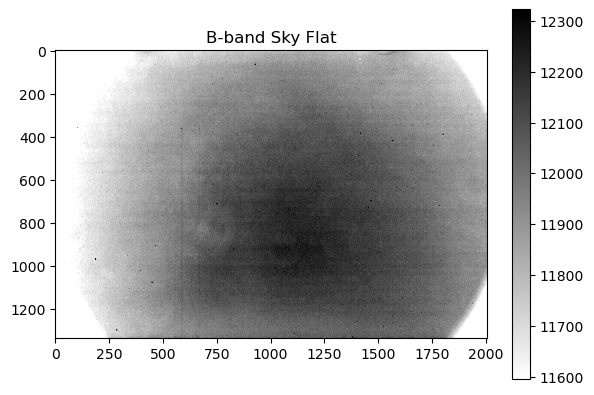

In [30]:
plt.figure()
data_flatb, header_flatb = fits.getdata('skyflat-0001b.fit',header=True)
imdisplay(data_flatb,v2perc=99)
plt.title("B-band Sky Flat")

Text(0.5, 1.0, 'V-band Sky Flat')

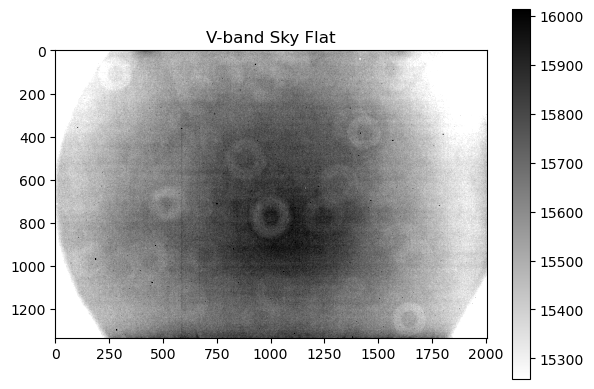

In [31]:
plt.figure()
data_flatv, header_flatv = fits.getdata('skyflat-0001v.fit',header=True)
imdisplay(data_flatv,v2perc=99)
plt.title("V-band Sky Flat")

## Problem 2 (5 points)
The two images above are two different flat field images.  The total number of counts depends on the brightness of the sky in the filte you are using at the time of observation.  Aside from a difference in the total counts, describe what the origins could be of the differences in the flatfields.  Pay attention to differences both at the large scale and the short scale.  

It is not required for the problem, but if you would like to better understand the differences between the two images, you can write a short bit of code that divides the two data arrays and then displays them.

answer goes here: In the B-band, there is a noticicable difference in the visual abbervation compared to the V-Band. The origins could come from the dust grains that could be on the mirror. The light from the B-band is at shorter wavelength compared to the V-Band light. Light can pass dust easier at shorter wavelength (this can be observed from the reason why we use IR light to see through dust) which can explain why there are more abbervations caused by the dust in the filter with longer wavelength. It could just be that the mirror had a different amount of dust between both images but that is unlikely because usually flatfields for different bands would be around the same time.

### Display or manipiulate a section of an image

You can feed sections of images to functions and they will either perform the necessary operations, or in the following case, display only those sections.  You may find it useful to consult the first python notebook we did, which had instructions on how to slice arrays.

## Problem 3 (5 points) - properly display a region of the image

You will need to complete the section of code below to display rows 400-900 and columns 750-1250.  You must compare the cutout to the full image above to make sure you are properly addressing rows and columns.

Text(0.5, 1.0, 'cutout of V-band image')

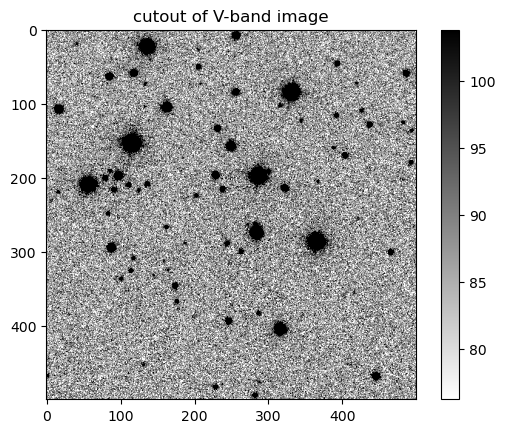

In [32]:
#to display only a section of an image you can perform the following operation
#this displays the section of the image
#***************** fill in the missing array range.
imdisplay(data_vimproc[399:899,749:1249]) #this displays the section of the image that displays the columns 400-900 and rows 750-1250. Python starts counting at 0.
plt.title("cutout of V-band image")
#NOTE: that it renumbers the pixels and does *not* refer back to the original image.  
#It also bases the colorbar stretch on the pixels in the subsection that you are displaying

#### Compute statistics on an image
You can pass an image to numpy and compute statistics on it.  In the example below, I show how to compute the standard deviation of all pixel values of a bias image.

I have included two bias images in this directy, numbers 20 and 21


the standard deviation of the Bias frame is 42.081744983055124


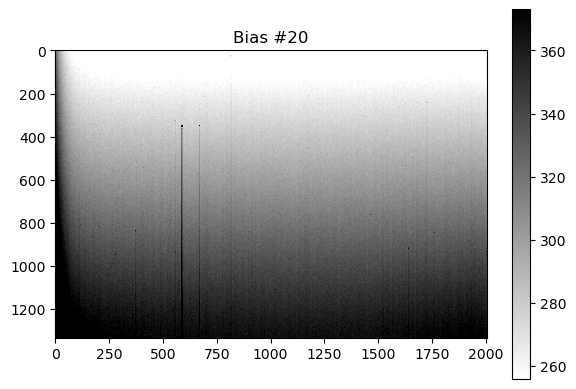

In [33]:
#first read in a bias image
plt.figure()
data_bias1, header_bias1 = fits.getdata('bias-0020.fit',header=True)
imdisplay(data_bias1)
plt.title("Bias #20")

print("the standard deviation of the Bias frame is", np.std(data_bias1))

## Problem 4 (5 points) - Compute the standard deviation of a subsection of the bias image
I would like you to write a peice of well-commented code that
1. displays the bias image extending over rows 600-800 and columns 1000-1200.
2. Measure the standard deviation of the pixels in this section of the bias and print it out.

Then I would like you to explain any differences in the stanard deviation between this subsection and that of the full image.


the standard deviation of the Bias frame is 12.980392044926841


Text(0.5, 1.0, 'Bias #20 Subset')

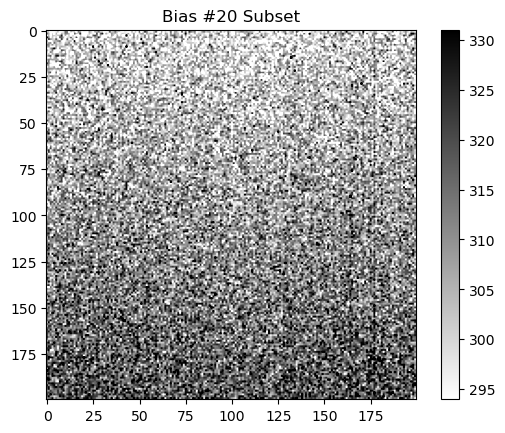

In [34]:
#Put your code here
#***********************
x = imdisplay(data_bias1[599:799,999:1199]) #this displays the section of the image that displays the columns 600-800 and rows 1000-1200. Python starts counting at 0.
#This displays the plotted data. Since the FITS file comes as an arrary, you can split it to just print out certain parts of the array.
#Python reads array as the first 
print("the standard deviation of the Bias frame is", np.std(data_bias1[599:799,999:1199])) #This prints out the standard deviation of the array from the subset of the whole array.
plt.title("Bias #20 Subset")

put your answer here: The difference between the two standard deviations is due to the number of samples and the mean. The first one is the population STDev and the second one is the sample of the population. This smaller section has a lot less of a range thus making the average value more true for the smaller range. There is less of a difference between (X_i - X^bar_i)^2 in the subset Bias frame. With the smaller range, there is less seperation between data points.

## Problem 5 (15 points) - compute the readnoise from two bias frames
Using the coding tools we described above and have used in the class, I would like you to 
1. write a well-commented program that measures the READNOISE using two bias frames and prints it out.  The name of the second bias frame is `bias-0021.fit`, which I have written code to read in. You cannot just use the answer from the question above, which was derived from one bias frame.
2. Describe why you can't jsut use one bias frame.
3. Comment on whether the number you derived is in electrons or ADU and justify your answer.

In [37]:
#read in the other bias image
data_bias2,header_bias2 = fits.getdata("bias-0021.fit",header=True)

#convert both arrays to floating point arrays.  This is needed to make sure that
#arithmetic operations will work as the images are otherwise positive definite (UNSIGNED) integers.
data_bias1 = np.array(data_bias1,"f")
data_bias2 = np.array(data_bias2,"f")

#*******************
#Your code here
#First you want to find the uncertainty of each bias frame. You can do this by finding the standard deviation of each frame.
#The two components are independent so you need to propergate the error.
x = np.std(data_bias1)
y = np.std(data_bias2)
Readnoise = np.sqrt(x**2 + y**2)







print("Readnoise of Bias Frame in ADU is = ", Readnoise)

Readnoise of Bias Frame in ADU is =  59.44182905511347


put answer to part 2 and 3 here: You cannot use one bias frame because when you process the image, you have different parts and thus you have to account for the different uncertainties. You have different StDev according to their respective bias field. When you combine both flat fields, you cannot assume that the readnoise is mutually inclusive because the StDev is different so you must sum the STDev together. Just using one completely neglates the effects of the missing bias frame.

3) This is in ADU because readout from the CCD has Gain which is in units of electrons/ADU and in this case, it would only be ADU.

## Problem 6 (15 points) - Compute gain of detector using flat field
1. Using your answer to Problem 5 and statistics of the B-band flat field image above, you will need to write a program that computes the gain of the CCD and prints it out.  Specify the units of the gain.  This will work for any flat-field image, but I just used the B-band (`data_flatb`) so that everyone is on the same page.

2. Include a text field with your mathematical derivation in LaTeX, which you can included in the text field.

3. Check your answer against the value in the header.  You can bring this value using `print(header_flatb['EGAIN'])`, where EGAIN is the header keyword for the gain.  Compute how accurate your estimate is.

**HINT:** You will need to think about the measured standard deviation of the pixel values in a section of the flatfield that is relatively uniform.  You can use that, and your knowledge of Poisson statistics and the way the gain affects the counts, to compute the gain.

In [36]:
#*********** 

#This is the flat field in the B band
#The flat field looks to be uniformly flat around 350 - 500, 1100-1250
flat = data_flatb[349:499,1099:1249]

#This is the flat field in the B band
N_c= np.std(flat) #Your uncertainty of the counts
N_ADU = np.mean(flat - data_bias1[349:499,1099:1249]) #Your average counts in ADU. You need to subtract the bias from the flat field.
sigma_ADU = np.sqrt(N_c**2 + Readnoise**2) #Your uncertainty of ADU is the propagation of uncertainty of the counts and the readnoise.
gain = N_ADU / sigma_ADU**2 #Your gain is the average counts in ADU divided by the uncertainty of ADU squared.


header = header_flatb['EGAIN']
PerDiff = np.absolute(gain - header)/ ((gain + header)/2) *100 #This is the percentage difference between the gain you calculated and the gain from the header keyword.

print("gain = ", gain)
print("gain from header keyword = ", header)
print("percentage differece = ", PerDiff)

gain =  0.9365226974975248
gain from header keyword =  1.6200000047683716
percentage differece =  53.469293009998886


Notes from class

$$ g\left[\frac{e^-}{\text{ADU}}\right] $$
$$ N_{\text{ADU}}g = N_{e^-} $$
$$ \sigma_{e^-} = \sqrt{N_{e^-}} $$
$$ g = f(N_{\text{ADU}}, \sigma_{\text{ADU}}) $$

After talking with friends and Dr. Rudnick, you have to propagate the error on counts for the uncertainty. We also found out that there is an additional source of error from the flat fields which comes from the read noise.

\begin{align*}
    \sigma_c^2 &= \sigma_{RN}^2 + \sigma_{\text{ADU}}^2
\end{align*}

You have different errors contributing including $\sigma_{RN}, \sigma_{e^-}, \sigma_{\text{ADU}}$ but really only $\sigma_{RN}$ and $\sigma_{\text{ADU}}$  are contributing uncertainties. 

We also need to find the function

\begin{align*}
    f(\sigma_{e^-}, g, N_{e^-})
\end{align*}

However, since $\sigma_{e^-} = \sqrt{N_{e^-}}$, it simplifies to

\begin{align*}
    f(g, N_{e^-})
\end{align*}

Given the formula

\begin{align*}
    N_{e^-} = N_{\text{ADU}}g
\end{align*}

You can find the uncertainty of $N_{e^-}$ by doing

\begin{align*}
    \sigma_{e^-} = \sqrt{\left(\frac{\partial N_{e^-}}{\partial N_{\text{ADU}}} \times \sigma_{\text{ADU}}\right)^2 + \left(\frac{\partial N_{e^-}}{\partial g}\times \sigma_g\right)^2}
\end{align*}

Since $g$ is measured (like the dial on an electric guitar) the second part of the equation essentially becomes 0. This implies:


$$\sigma_{e^-} = g\sigma_{ADU}$$

Using the conditions and notes from before you have

$$\sigma_{e^-}^2 = (g\sigma_{ADU})^2 \text{ which is = to } gN_{ADU}$$

Doing a little bit of algebra gets you that the gain be calculated as
$$g =\frac{N_{ADU}}{\sigma_{ADU}^2}$$

Although the flat field is supposed to be have a very small uncertainty, it seems that it deviated the answer away further. After trying for an extra hour or so, we couldn't figure it out however we believe that it could be either that we did not follow what you told us during office hour correctly or that the readnoise could have been calcuated incorrectly.